# Brian2 Neuron + Synapse Simulation Explanation

This notebook demonstrates a minimal example of simulating a **single leaky integrate-and-fire neuron** receiving synaptic input using the Brian2 simulator.

## Simulation Setup

- **Duration:** 100 ms  
- **Neuron parameters:**  
  - Membrane time constant (\(\tau\)) = 10 ms  
  - Spike threshold (\(V_t\)) = -50 mV  
  - Reset potential (\(V_r\)) = -60 mV  
  - Resting potential (\(E_l\)) = -60 mV  

## Neuron Model Equations

The membrane potential \(v\) evolves according to the differential equation:

\[
\frac{dv}{dt} = \frac{E_l - v}{\tau}
\]

This describes how the membrane potential leaks towards the resting potential over time.

## Neuron Group

- A single neuron is created with the model above.
- The neuron fires a spike when \(v\) exceeds \(V_t\).
- After firing, \(v\) resets to \(V_r\).

## Presynaptic Neuron

- A presynaptic neuron generates a single spike at **10 ms** using `SpikeGeneratorGroup`.

## Synapse

- The presynaptic neuron connects to the postsynaptic neuron via a synapse.
- Each presynaptic spike increments the postsynaptic \(v\) by \(5 \text{ mV}\).

## Recording and Visualization

- The postsynaptic membrane potential is recorded over the simulation.
- After the simulation, the voltage trace is plotted against time, showing the effect of synaptic input.

---

## Summary

This example illustrates the fundamental interaction between synaptic input and postsynaptic neuron membrane potential dynamics in Brian2. It provides a flexible foundation to build more realistic neuron and network models using equation-based descriptions.



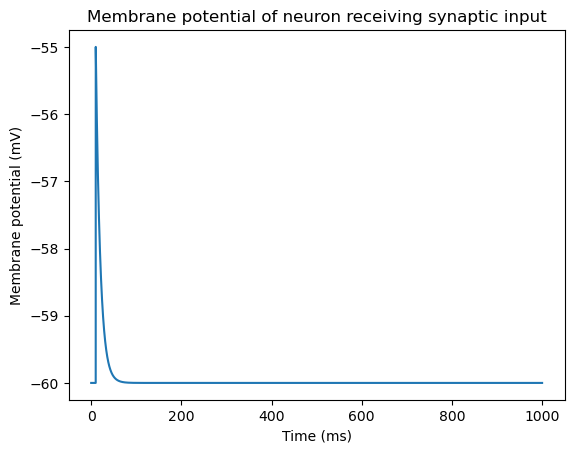

In [4]:
from brian2 import *

# Define simulation duration
duration = 1000 * ms

# Neuron parameters: a simple leaky integrate-and-fire neuron
tau = 10 * ms       # Membrane time constant
Vt = -50 * mV       # Spike threshold
Vr = -60 * mV       # Reset potential
El = -60 * mV       # Resting potential

# Neuron model equations
eqs = '''
dv/dt = (El - v) / tau : volt
'''

# Create a single neuron group
G = NeuronGroup(1, model=eqs, threshold='v > Vt', reset='v = Vr', method='linear')
G.v = El  # Initial membrane potential

# Create a presynaptic neuron group that fires a spike at 10 ms
pre_neuron = SpikeGeneratorGroup(1, indices=[0], times=[10*ms])

# Synapse definition: The synapse increases the postsynaptic neuron membrane potential by a fixed amount on each presynaptic spike
syn = Synapses(pre_neuron, G, on_pre='v += 5*mV')
syn.connect()

# Record membrane potential of the postsynaptic neuron
mon = StateMonitor(G, 'v', record=0)

# Run simulation
run(duration)

# Plot membrane potential over time
import matplotlib.pyplot as plt
plt.plot(mon.t/ms, mon.v[0]/mV)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential of neuron receiving synaptic input')
plt.show()
